# Python for Data Analysis

In [1]:
# %pprint
# %precision %0.3f
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi = False

In [2]:
# Display full output of cell not just last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
np.set_printoptions(edgeitems=10, linewidth=120) # set numpy output width
np.set_printoptions(precision=3)
#np.set_printoptions(edgeitems=10, linewidth=180) # set numpy output width
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}) # formatter is always reset with a call to set_printoptions so must be last to stand

In [5]:
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.float_format = "{:.3f}".format
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%pwd

'D:\\GitHub\\Data-Science\\Python\\Python for Data Analysis'

# 14. Data Analysis Examples

## 14.1 1.USA.gov Data from Bitly

In [8]:
path = 'datasets/bitly_usagov/example.txt'
f = open(path)
print(f.readline())
f.close()

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [9]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]
records[0]
len(records)

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

3560

In [10]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [11]:
# Get top 10 listed time zones using Counter object
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [12]:
def get_count(sequence):
    count_dict = {}
    for x in sequence:
        if x in count_dict:
            count_dict[x] += 1
        else:
            count_dict[x] = 1
    # tranform the dictionary to a sorted list of tuples
    sorted_list  = sorted(count_dict.items(), key=lambda item: item[1], reverse=True)
    # re-create and return as sorted dictionary
    return {k: v for k, v in sorted_list}

In [13]:
counts = get_count(time_zones)

In [14]:
frame = pd.DataFrame(records)
frame
print(frame._is_copy)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.000,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1331923247.000,1331822918.000,Danvers,"[42.576698, -70.954903]",nan,NaN
1,GoogleMaps/RochesterNY,US,0.000,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331923249.000,1308262393.000,Provo,"[40.218102, -111.613297]",nan,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.000,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1331923250.000,1331919941.000,Washington,"[38.9007, -77.043098]",nan,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.000,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1331923249.000,1331923068.000,Braz,"[-23.549999, -46.616699]",nan,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.000,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1331923251.000,1273672411.000,Shrewsbury,"[42.286499, -71.714699]",nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.000,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1331926841.000,1301298479.000,Paramus,"[40.9445, -74.07]",nan,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.000,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1331926844.000,1307530247.000,Oklahoma City,"[35.4715, -97.518997]",nan,NaN
3557,GoogleMaps/RochesterNY,US,0.000,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331926846.000,1308262393.000,Provo,"[40.218102, -111.613297]",nan,NaN
3558,GoogleProducer,US,0.000,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1331926847.000,1327528527.000,Mountain View,"[37.419201, -122.057404]",nan,NaN


None


In [15]:
tz_counts = frame['tz'].value_counts()
tz_counts
type(tz_counts)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
                       ... 
America/St_Kitts          1
America/La_Paz            1
Africa/Casablanca         1
Africa/Johannesburg       1
America/Caracas           1
Name: tz, Length: 97, dtype: int64

pandas.core.series.Series

In [16]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

In [17]:
tz_counts = clean_tz.value_counts()
tz_counts

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
                       ... 
Africa/Johannesburg       1
America/St_Kitts          1
America/La_Paz            1
Africa/Casablanca         1
America/Caracas           1
Name: tz, Length: 98, dtype: int64

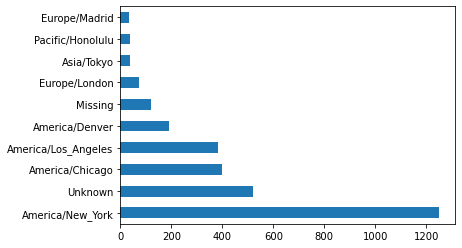

In [18]:
tz_counts[:10].plot(kind='barh')

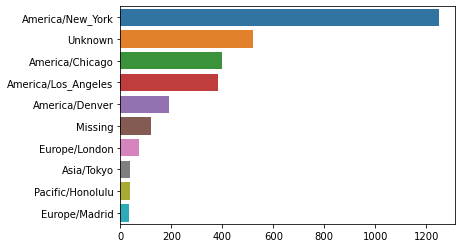

In [19]:
sns.barplot(tz_counts[:10].values, tz_counts[:10].index)

In [20]:
tz_counts
type(tz_counts)

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
                       ... 
Africa/Johannesburg       1
America/St_Kitts          1
America/La_Paz            1
Africa/Casablanca         1
America/Caracas           1
Name: tz, Length: 98, dtype: int64

pandas.core.series.Series

In [21]:
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.000,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1331923247.000,1331822918.000,Danvers,"[42.576698, -70.954903]",nan,NaN
1,GoogleMaps/RochesterNY,US,0.000,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331923249.000,1308262393.000,Provo,"[40.218102, -111.613297]",nan,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.000,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1331923250.000,1331919941.000,Washington,"[38.9007, -77.043098]",nan,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.000,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1331923249.000,1331923068.000,Braz,"[-23.549999, -46.616699]",nan,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.000,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1331923251.000,1273672411.000,Shrewsbury,"[42.286499, -71.714699]",nan,NaN


In [22]:
results = pd.Series(agent.split()[0] for agent in frame['a'].dropna())
results

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [23]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

In [24]:
cframe = frame[frame.a.notnull()] # returns a copy of the matching rows from the original dataframe
cframe._is_copy = None # decouple the dataframe from its origin to avoid copy warning
cframe.loc[:, 'os'] = np.where(cframe.a.str.contains('Windows'), 'Windows', 'Not Windows')
cframe['tz'].fillna('Missing', inplace = True)
cframe['tz'].replace('', 'Unknown', inplace=True)

In [25]:
cframe._is_view # is cframe a view (reference) to another frame??

False

In [26]:
print(cframe._is_copy)

None


In [27]:
cframe[['tz', 'os']][:10]

,tz,os
0,America/New_York,Windows
1,America/Denver,Not Windows
2,America/New_York,Windows
3,America/Sao_Paulo,Not Windows
4,America/New_York,Windows
5,America/New_York,Windows
6,Europe/Warsaw,Windows
7,Unknown,Windows
8,Unknown,Not Windows
9,Unknown,Windows


In [28]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [29]:
by_tz_os.count()

a   c   nk  gr    g    h    l   al   hh    r    u    t   hc  \
tz                  os                                                                           
Africa/Cairo        Windows        3   3    3   3    3    3    3    3    3    3    3    3    3   
Africa/Casablanca   Windows        1   1    1   1    1    1    1    1    1    1    1    1    1   
Africa/Ceuta        Windows        2   2    2   2    2    2    2    2    2    2    2    2    2   
Africa/Johannesburg Windows        1   1    1   1    1    1    1    1    1    1    1    1    1   
Africa/Lusaka       Windows        1   1    1   1    1    1    1    1    1    1    1    1    1   
...                              ...  ..  ...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Pacific/Auckland    Not Windows    3   3    3   3    3    3    3    3    3    3    3    3    3   
                    Windows        8   8    8   8    8    8    8    1    8    8    8    8    8   
Pacific/Honolulu    Windows       36  36   36  36   36   36   36   36   36   36   36   36   36   
Unknown             Not Windows  245   0  245   0  245  245  245  239  245  245  245  245  245   
                    Windows      276   0  276   0  276  276  276  268  276  276  276  276  276   

                                 cy  ll  _heartbeat_  kw  
tz                  os                                    
Africa/Cairo        Windows       3   3            0   0  
Africa/Casablanca   Windows       1   1            0   0  
Africa/Ceuta        Windows       2   2            0   0  
Africa/Johannesburg Windows       1   1            0   0  
Africa/Lusaka       Windows       1   1            0   0  
...                              ..  ..          ...  ..  
Pacific/Auckland    Not Windows   3   3            0   0  
                    Windows       8   8            0   0  
Pacific/Honolulu    Windows      36  36            0  32  
Unknown             Not Windows   0   0            0   4  
                    Windows       0   0            0   7  

[149 rows x 17 columns]

In [30]:
by_tz_os.size()
type(by_tz_os.size())
by_tz_os.size().index

tz                   os         
Africa/Cairo         Windows          3
Africa/Casablanca    Windows          1
Africa/Ceuta         Windows          2
Africa/Johannesburg  Windows          1
Africa/Lusaka        Windows          1
                                   ... 
Pacific/Auckland     Not Windows      3
                     Windows          8
Pacific/Honolulu     Windows         36
Unknown              Not Windows    245
                     Windows        276
Length: 149, dtype: int64

pandas.core.series.Series

MultiIndex([(                  'Africa/Cairo',     'Windows'),
            (             'Africa/Casablanca',     'Windows'),
            (                  'Africa/Ceuta',     'Windows'),
            (           'Africa/Johannesburg',     'Windows'),
            (                 'Africa/Lusaka',     'Windows'),
            (             'America/Anchorage', 'Not Windows'),
            (             'America/Anchorage',     'Windows'),
            ('America/Argentina/Buenos_Aires', 'Not Windows'),
            (     'America/Argentina/Cordoba',     'Windows'),
            (     'America/Argentina/Mendoza',     'Windows'),
            ...
            (                'Europe/Vilnius',     'Windows'),
            (              'Europe/Volgograd',     'Windows'),
            (                 'Europe/Warsaw', 'Not Windows'),
            (                 'Europe/Warsaw',     'Windows'),
            (                 'Europe/Zurich', 'Not Windows'),
            (              'Pacific/Auc

In [31]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts
type(agg_counts)

os,Not Windows,Windows
tz,,
Africa/Cairo,0.000,3.000
Africa/Casablanca,0.000,1.000
Africa/Ceuta,0.000,2.000
Africa/Johannesburg,0.000,1.000
Africa/Lusaka,0.000,1.000
...,...,...
Europe/Warsaw,1.000,15.000
Europe/Zurich,4.000,0.000
Pacific/Auckland,3.000,8.000


pandas.core.frame.DataFrame

In [32]:
indexer = agg_counts.sum(1).argsort()
type(indexer)
indexer # an indexer[0] value tells you the index of the item in the original agg_counts that will be the top in a sorted agg_counts

pandas.core.series.Series

tz
Africa/Cairo           75
Africa/Casablanca      36
Africa/Ceuta           35
Africa/Johannesburg    54
Africa/Lusaka          33
                       ..
Europe/Warsaw          14
Europe/Zurich          21
Pacific/Auckland       11
Pacific/Honolulu       96
Unknown                28
Length: 97, dtype: int64

In [33]:
count_subset = agg_counts.take(indexer[-10:])
count_subset
type(count_subset)

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.000,20.000
Europe/Madrid,16.000,19.000
Pacific/Honolulu,0.000,36.000
Asia/Tokyo,2.000,35.000
Europe/London,43.000,31.000
America/Denver,132.000,59.000
America/Los_Angeles,130.000,252.000
America/Chicago,115.000,285.000
Unknown,245.000,276.000


pandas.core.frame.DataFrame

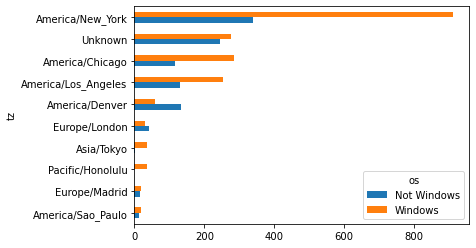

In [34]:
count_subset.plot(kind='barh')

In [35]:
count_subset = count_subset.stack()
count_subset.name = 'total' # name of the series becomes the name of the column after tranforming to a dataframe
count_subset = count_subset.reset_index() # transforming to a dataframe
count_subset

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.000
1,America/Sao_Paulo,Windows,20.000
2,Europe/Madrid,Not Windows,16.000
3,Europe/Madrid,Windows,19.000
4,Pacific/Honolulu,Not Windows,0.000
5,Pacific/Honolulu,Windows,36.000
6,Asia/Tokyo,Not Windows,2.000
7,Asia/Tokyo,Windows,35.000
8,Europe/London,Not Windows,43.000
9,Europe/London,Windows,31.000


In [36]:
count_subset_tranformed = count_subset.groupby('tz').transform(lambda x: x / x.sum())
count_subset_tranformed.columns = ['norm_total']

In [37]:
count_subset = pd.concat([count_subset, count_subset_tranformed], axis=1)
count_subset

,tz,os,total,norm_total
0,America/Sao_Paulo,Not Windows,13.000,0.394
1,America/Sao_Paulo,Windows,20.000,0.606
2,Europe/Madrid,Not Windows,16.000,0.457
3,Europe/Madrid,Windows,19.000,0.543
4,Pacific/Honolulu,Not Windows,0.000,0.000
5,Pacific/Honolulu,Windows,36.000,1.000
6,Asia/Tokyo,Not Windows,2.000,0.054
7,Asia/Tokyo,Windows,35.000,0.946
8,Europe/London,Not Windows,43.000,0.581
9,Europe/London,Windows,31.000,0.419


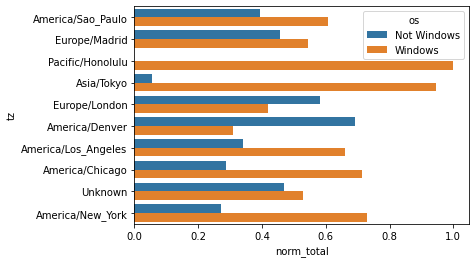

In [38]:
sns.barplot(x='norm_total', y='tz', hue='os', data=count_subset)

# 14.2 MovieLens 1M Dataset

In [39]:
# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::', header=None, names=mnames)

users[:5]
ratings[:5]
movies[:5]

<ipython-input-39-4a34742410ef>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table('datasets/movielens/users.dat', sep='::', header=None, names=unames)
<ipython-input-39-4a34742410ef>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::', header=None, names=rnames)
<ipython-input-39-4a34742410ef>:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engi

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [41]:
mean_ratings = pd.pivot_table(data, values=['rating'], index='title', columns='gender')
mean_ratings

rating      
gender                                          F     M
title                                                  
$1,000,000 Duck (1971)                      3.375 2.762
'Night Mother (1986)                        3.389 3.353
'Til There Was You (1997)                   2.676 2.733
'burbs, The (1989)                          2.793 2.962
...And Justice for All (1979)               3.829 3.689
...                                           ...   ...
Zed & Two Noughts, A (1985)                 3.500 3.381
Zero Effect (1998)                          3.864 3.723
Zero Kelvin (Kjærlighetens kjøtere) (1995)    nan 3.500
Zeus and Roxanne (1997)                     2.778 2.357
eXistenZ (1999)                             3.099 3.289

[3706 rows x 2 columns]

In [42]:
ratings_by_title = data.groupby('title').size()
ratings_by_title.sort_values(ascending=False)

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Anna (1996)                                                 1
McCullochs, The (1975)                                      1
Shadows (Cienie) (1988)                                     1
Night Tide (1961)                                           1
Another Man's Poison (1952)                                 1
Length: 3706, dtype: int64

In [43]:
ratings_by_title[ratings_by_title >= 250]

title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
                                    ... 
Young Guns (1988)                    562
Young Guns II (1990)                 369
Young Sherlock Holmes (1985)         379
Zero Effect (1998)                   301
eXistenZ (1999)                      410
Length: 1216, dtype: int64

In [44]:
mean_ratings[ratings_by_title >= 250]

rating      
gender                                 F     M
title                                         
'burbs, The (1989)                 2.793 2.962
10 Things I Hate About You (1999)  3.647 3.312
101 Dalmatians (1961)              3.791 3.500
101 Dalmatians (1996)              3.240 2.911
12 Angry Men (1957)                4.184 4.328
...                                  ...   ...
Young Guns (1988)                  3.372 3.426
Young Guns II (1990)               2.935 2.904
Young Sherlock Holmes (1985)       3.515 3.363
Zero Effect (1998)                 3.864 3.723
eXistenZ (1999)                    3.099 3.289

[1216 rows x 2 columns]

In [45]:
mean_ratings = mean_ratings.loc[ratings_by_title >= 250]
mean_ratings
type(mean_ratings)

rating      
gender                                 F     M
title                                         
'burbs, The (1989)                 2.793 2.962
10 Things I Hate About You (1999)  3.647 3.312
101 Dalmatians (1961)              3.791 3.500
101 Dalmatians (1996)              3.240 2.911
12 Angry Men (1957)                4.184 4.328
...                                  ...   ...
Young Guns (1988)                  3.372 3.426
Young Guns II (1990)               2.935 2.904
Young Sherlock Holmes (1985)       3.515 3.363
Zero Effect (1998)                 3.864 3.723
eXistenZ (1999)                    3.099 3.289

[1216 rows x 2 columns]

pandas.core.frame.DataFrame

In [46]:
mean_ratings.sort_values(by=('rating','F'), ascending=False) # top movies ratings by Females

# Note: Since columns in the data frame have a hierarchical index, if you want to sort by 'F' column you have to use
# a hierarchical qualifier for it as a tuple of hierarchical column name like ('rating', 'F') in the call to sort_values.
# This happened because in the pivot_table call above we used a list for values=['rating']. If used 'rating' only, there would 
# not be a hierarchical columns in the resulting data frame and it would just be F M

rating      
gender                                                  F     M
title                                                          
Close Shave, A (1995)                               4.644 4.474
Wrong Trousers, The (1993)                          4.588 4.478
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)       4.573 4.465
Wallace & Gromit: The Best of Aardman Animation...  4.563 4.385
Schindler's List (1993)                             4.563 4.491
...                                                   ...   ...
Avengers, The (1998)                                1.915 2.017
Speed 2: Cruise Control (1997)                      1.907 1.863
Rocky V (1990)                                      1.879 2.133
Barb Wire (1996)                                    1.585 2.100
Battlefield Earth (2000)                            1.574 1.617

[1216 rows x 2 columns]

In [47]:
mean_ratings['diff'] = mean_ratings[('rating','M')] - mean_ratings[('rating','F')]
mean_ratings

<ipython-input-47-8bd449a2f269>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_ratings['diff'] = mean_ratings[('rating','M')] - mean_ratings[('rating','F')]


rating         diff
gender                                 F     M       
title                                                
'burbs, The (1989)                 2.793 2.962  0.169
10 Things I Hate About You (1999)  3.647 3.312 -0.335
101 Dalmatians (1961)              3.791 3.500 -0.291
101 Dalmatians (1996)              3.240 2.911 -0.329
12 Angry Men (1957)                4.184 4.328  0.144
...                                  ...   ...    ...
Young Guns (1988)                  3.372 3.426  0.054
Young Guns II (1990)               2.935 2.904 -0.031
Young Sherlock Holmes (1985)       3.515 3.363 -0.151
Zero Effect (1998)                 3.864 3.723 -0.141
eXistenZ (1999)                    3.099 3.289  0.190

[1216 rows x 3 columns]

In [48]:
mean_ratings.sort_values('diff', ascending=True) # movies highly rated by women that men did not rate as highly

rating         diff
gender                                      F     M       
title                                                     
Dirty Dancing (1987)                    3.790 2.960 -0.831
Jumpin' Jack Flash (1986)               3.255 2.578 -0.676
Grease (1978)                           3.975 3.367 -0.608
Little Women (1994)                     3.871 3.322 -0.549
Steel Magnolias (1989)                  3.902 3.366 -0.536
...                                       ...   ...    ...
Cable Guy, The (1996)                   2.250 2.864  0.614
Longest Day, The (1962)                 3.412 4.031  0.620
Dumb & Dumber (1994)                    2.698 3.337  0.639
Kentucky Fried Movie, The (1977)        2.879 3.555  0.676
Good, The Bad and The Ugly, The (1966)  3.495 4.221  0.726

[1216 rows x 3 columns]

In [49]:
mean_ratings.sort_values('diff', ascending=False) # movies highly rated by men that women did not rate as highly

rating         diff
gender                                      F     M       
title                                                     
Good, The Bad and The Ugly, The (1966)  3.495 4.221  0.726
Kentucky Fried Movie, The (1977)        2.879 3.555  0.676
Dumb & Dumber (1994)                    2.698 3.337  0.639
Longest Day, The (1962)                 3.412 4.031  0.620
Cable Guy, The (1996)                   2.250 2.864  0.614
...                                       ...   ...    ...
Steel Magnolias (1989)                  3.902 3.366 -0.536
Little Women (1994)                     3.871 3.322 -0.549
Grease (1978)                           3.975 3.367 -0.608
Jumpin' Jack Flash (1986)               3.255 2.578 -0.676
Dirty Dancing (1987)                    3.790 2.960 -0.831

[1216 rows x 3 columns]

# 14.3 US Baby Names 1880–2010

In [50]:
columns = ['name', 'sex', 'births']
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', names=columns)
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [51]:
names1880.groupby('sex').sum()

,births
sex,
F,90993
M,110493


In [52]:
years = range(1880, 2011)

pieces = []

#names = pd.DataFrame(columns = columns+['year']) # dtypes will all be object, not good!!

for year in years:
    frame = pd.read_csv('datasets/babynames/yob%d.txt' % year, names=columns)
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True) #this way dtypes of columns will be int, float, etc as appropriate
names.info()
names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [53]:
names.groupby(['year', 'sex']).births.sum().unstack()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


In [54]:
total_births  = names.pivot_table(values='births', index='year', columns='sex', aggfunc=sum)
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


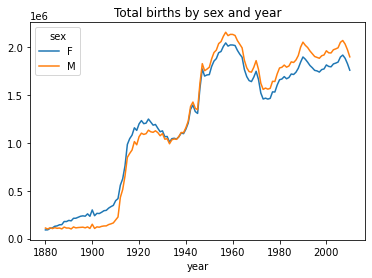

In [55]:
total_births.plot(title='Total births by sex and year')

In [56]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names

#for name, group in names.groupby(['year', 'sex']):
#    print (name)
#    group

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.078
1,Anna,F,2604,1880,0.029
2,Emma,F,2003,1880,0.022
3,Elizabeth,F,1939,1880,0.021
4,Minnie,F,1746,1880,0.019
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000
1690780,Zyonne,M,5,2010,0.000
1690781,Zyquarius,M,5,2010,0.000
1690782,Zyran,M,5,2010,0.000


In [57]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F     1.000
      M     1.000
1881  F     1.000
      M     1.000
1882  F     1.000
             ... 
2008  M     1.000
2009  F     1.000
      M     1.000
2010  F     1.000
      M     1.000
Name: prop, Length: 262, dtype: float64

In [58]:
#get top 1000 names by year and sex
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)
top1000.info()
top1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261877 entries, 0 to 261876
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    261877 non-null  object 
 1   sex     261877 non-null  object 
 2   births  261877 non-null  int64  
 3   year    261877 non-null  int64  
 4   prop    261877 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.0+ MB


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.078
1,Anna,F,2604,1880,0.029
2,Emma,F,2003,1880,0.022
3,Elizabeth,F,1939,1880,0.021
4,Minnie,F,1746,1880,0.019
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000
261873,Destin,M,194,2010,0.000
261874,Jaquan,M,194,2010,0.000
261875,Jaydan,M,194,2010,0.000


## Analyzing Naming Trends

In [59]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

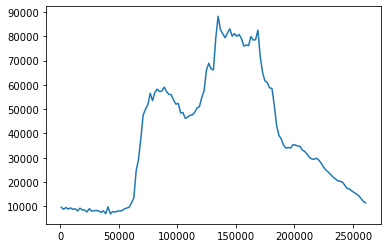

In [60]:
boys[boys.name == 'John']['births'].plot()

In [61]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C96D25430>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000025C96E54A60>], dtype=object)

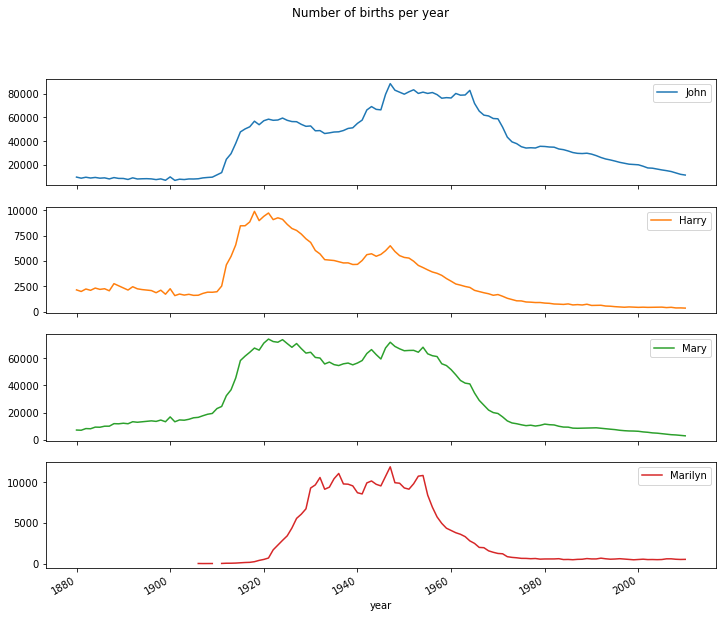

In [62]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

## Measuring the increase in naming diversity

In [63]:
total_prop = top1000.pivot_table(values='prop', index='year', columns='sex', aggfunc=sum)
total_prop

sex,F,M
year,,
1880,1.000,0.997
1881,1.000,1.000
1882,0.999,0.996
1883,0.998,0.999
1884,0.993,0.995
...,...,...
2006,0.753,0.860
2007,0.746,0.855
2008,0.741,0.850


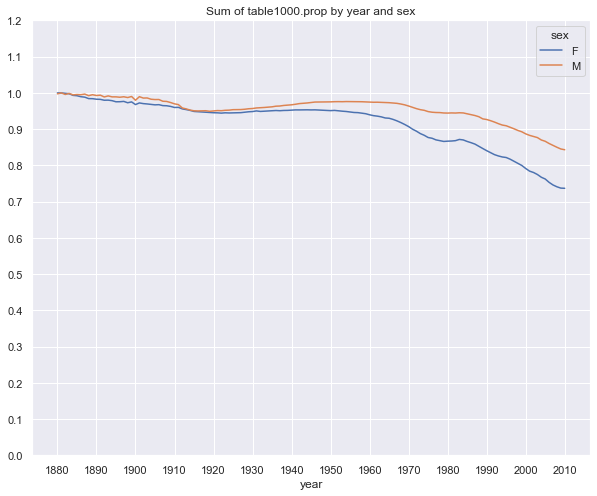

In [64]:
sns.set()
total_prop.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), 
                xticks=range(1880, 2020, 10), figsize=(10,8))

In [65]:
def get_quantile_count(group, q=0.5):
    return group.sort_values(by='prop', ascending=False).prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

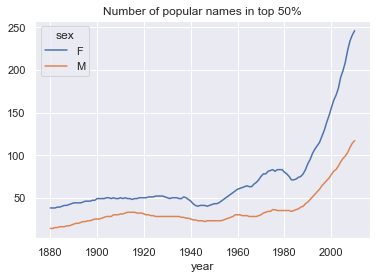

In [66]:
diversity.unstack().plot(title="Number of popular names in top 50%")

Notice it needs more names as years progress in order to reach 50% of births in a paricular year. 
As you can see, girl names have always been more diverse than boy names, and they have only become more so over time.

## Boy names that became girl names (and vice versa)

Another fun trend is looking at boy names that were more popular with one sex ear‐
lier in the sample but have “changed sexes” in the present. One example is the name
Lesley or Leslie.

In [67]:
all_names = pd.Series(top1000.name.unique()) # series containing unique names
lesley_like = all_names[all_names.str.lower().str.contains('lesl')] # get all names like *Lesl*
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [68]:
filtered = top1000[top1000.name.isin(lesley_like)] # return a subset dataframe of names like *lesl*
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000
1108,Leslie,M,79,1880,0.001
2462,Leslie,F,11,1881,0.000
3014,Leslie,M,92,1881,0.001
4512,Leslie,F,9,1882,0.000
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000
258036,Leslie,F,1975,2009,0.001
258378,Lesly,F,598,2009,0.000
260073,Leslie,F,1558,2010,0.001


In [69]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [70]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table

sex,F,M
year,,
1880,8.000,79.000
1881,11.000,92.000
1882,9.000,128.000
1883,7.000,125.000
1884,15.000,125.000
...,...,...
2006,4166.000,nan
2007,3805.000,nan
2008,3022.000,nan


In [71]:
table = table.div(table.sum(1), axis=0)
table

sex,F,M
year,,
1880,0.092,0.908
1881,0.107,0.893
1882,0.066,0.934
1883,0.053,0.947
1884,0.107,0.893
...,...,...
2006,1.000,nan
2007,1.000,nan
2008,1.000,nan


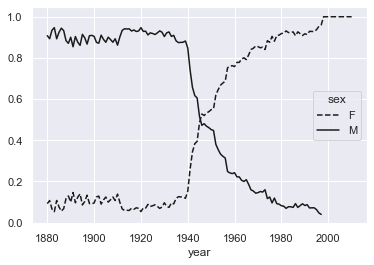

In [72]:
table.plot(style={'M': 'k-', 'F': 'k--'})